# **CART Decision Tree**

https://www.meccanismocomplesso.org/en/the-cart-algorithm-in-machine-learning-with-python/

https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd

Import required libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

**Decision Tree Classifier**

In [196]:
data = pd.read_csv('/content/Social_Network_Ads.csv')

data.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [197]:
data.columns

Index(['UserID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [198]:
data.isnull().sum()

UserID             0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [200]:
data.describe()

,UserID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [201]:
data.drop(['UserID'], inplace = True, axis = 1)

<ipython-input-202-ea030b02ce8c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True);


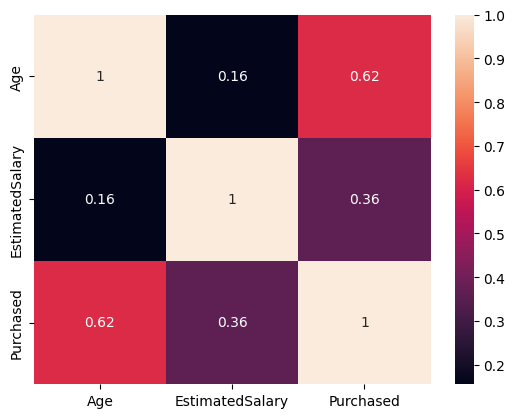

In [202]:
#data.corr()
import seaborn as sns
sns.heatmap(data.corr(),annot=True);

In [203]:
non_numerical_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print(non_numerical_columns)

['Gender']


In [204]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

label_encoder = LabelEncoder()

for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Now, the non-numeric columns are encoded

In [205]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [206]:
x = data[['Age','EstimatedSalary']]
y = data['Purchased']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

Model 1

In [208]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

Y_pred = DTC.predict(X_test)

In [209]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,Y_pred) * 100)
print(metrics.confusion_matrix(y_test,Y_pred))
print(metrics.classification_report(y_test,Y_pred))

85.0
[[45  7]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        52
           1       0.77      0.82      0.79        28

    accuracy                           0.85        80
   macro avg       0.83      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80



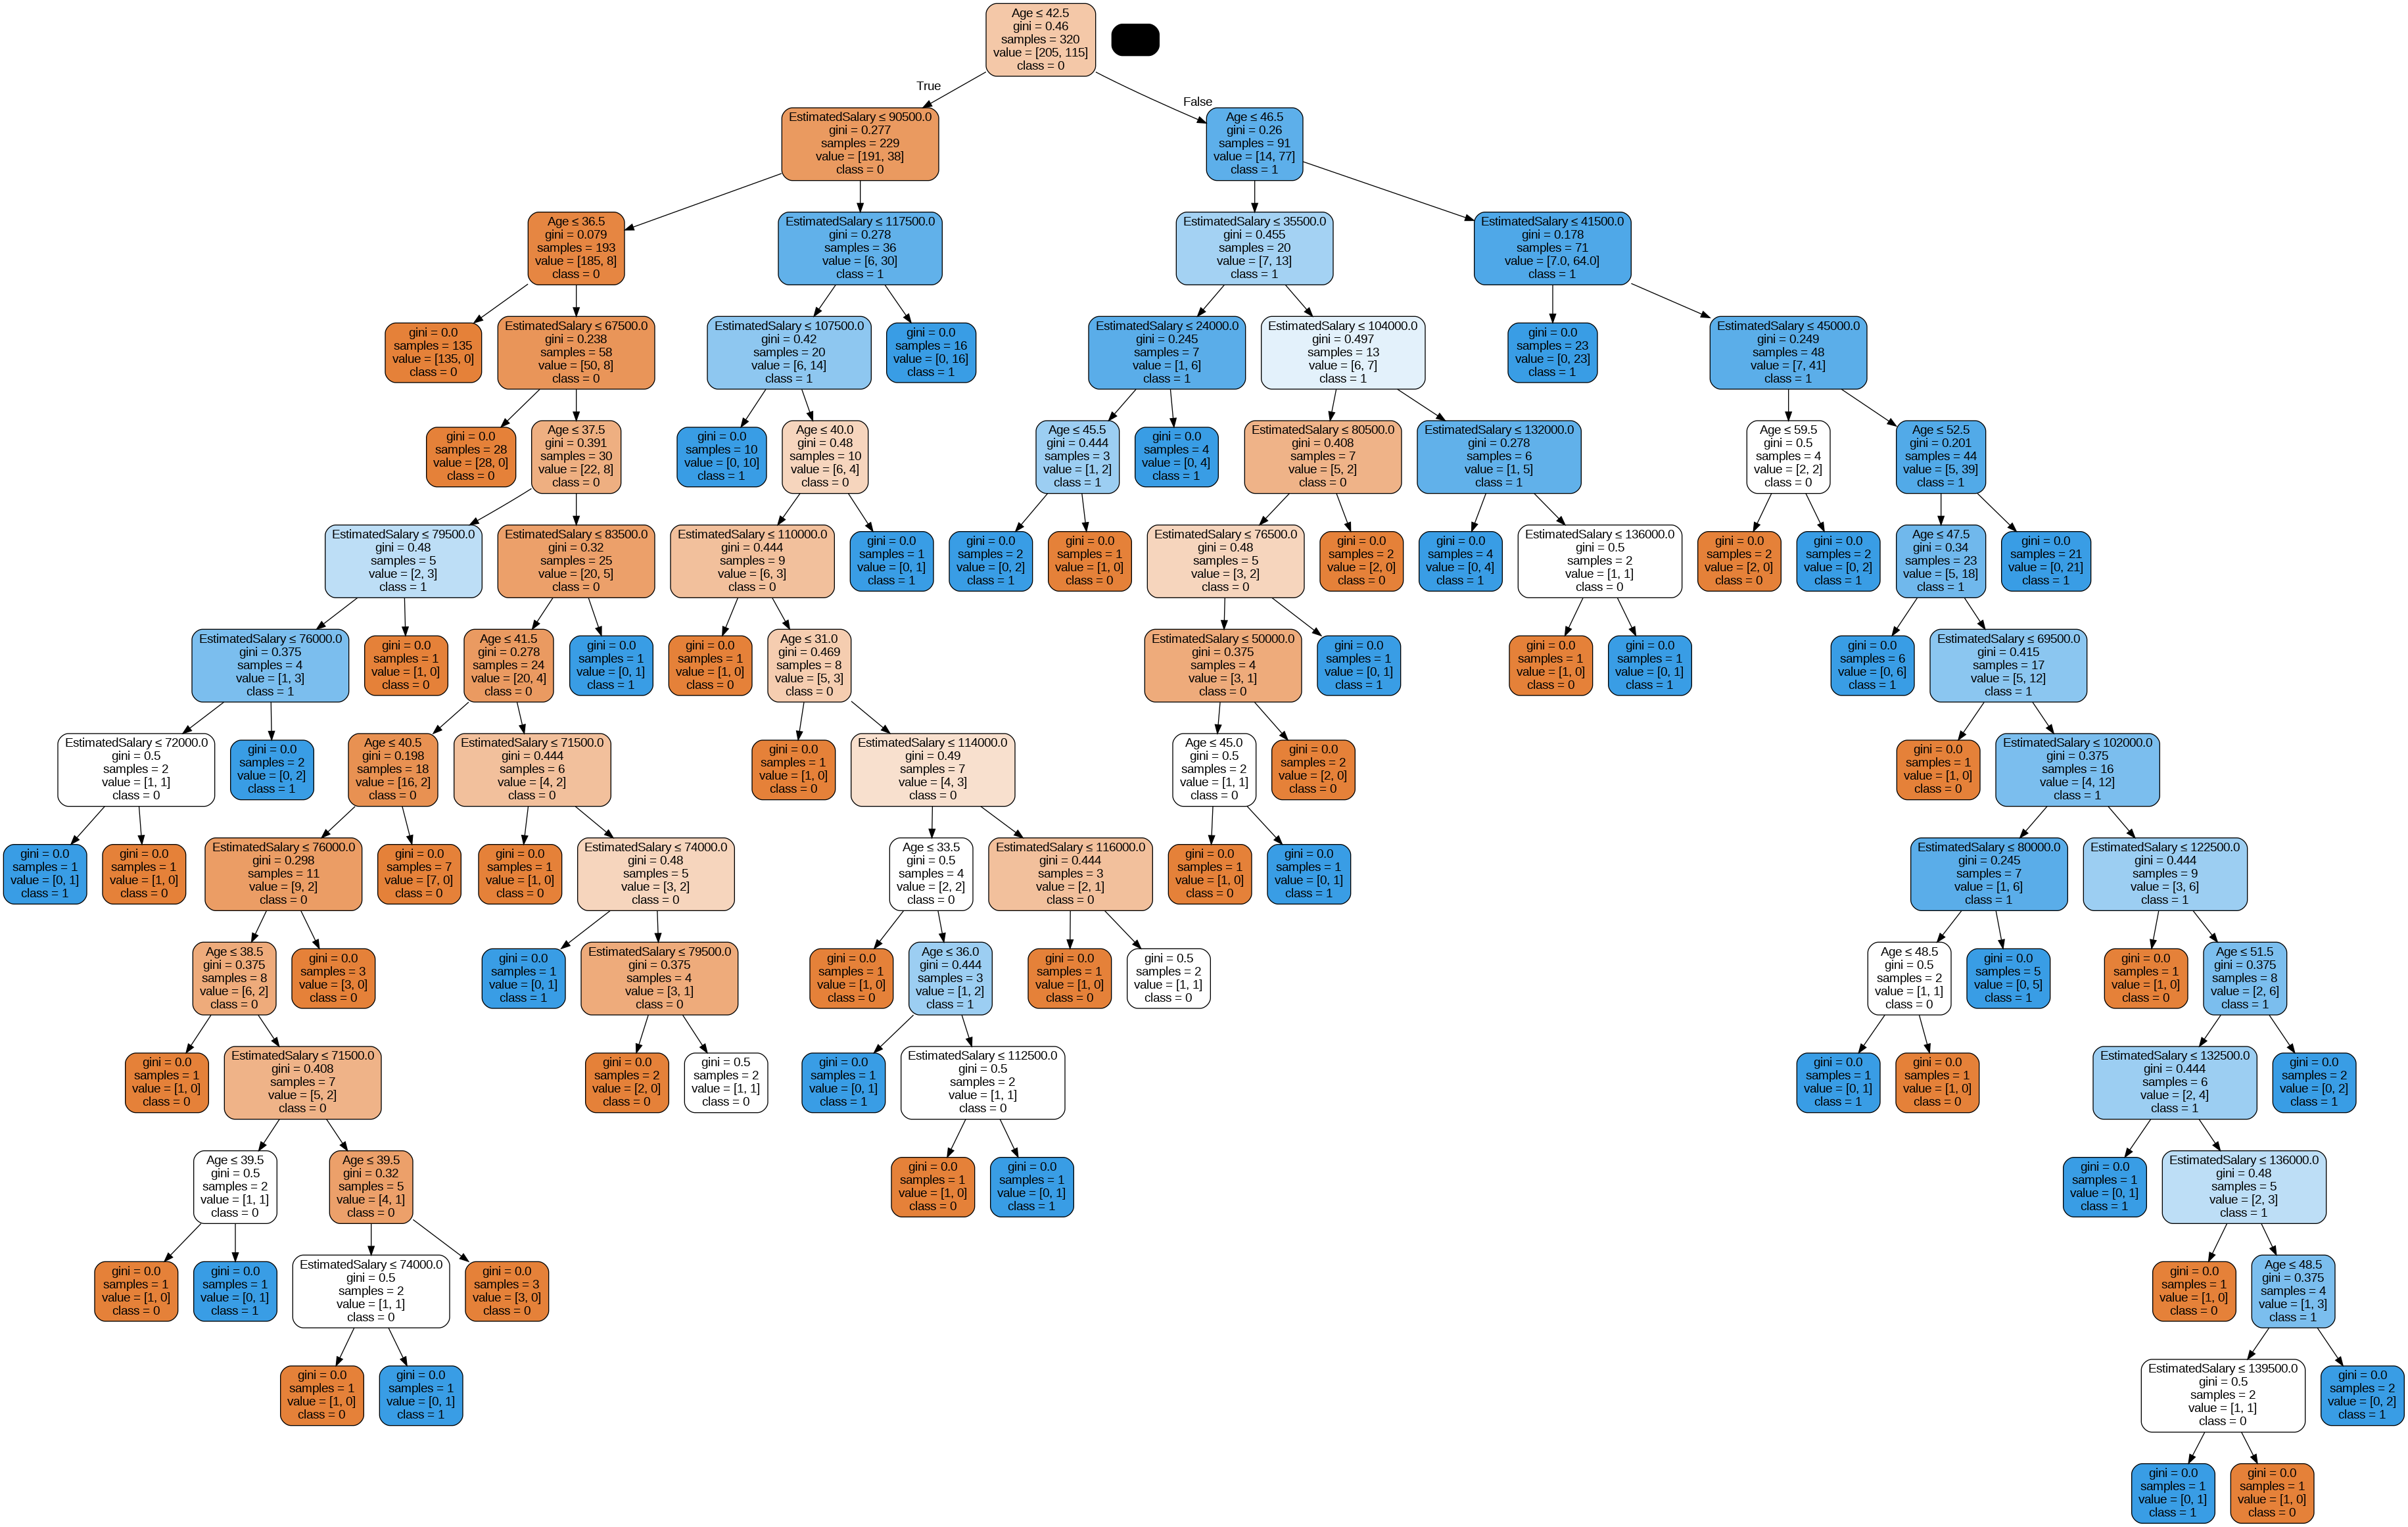

In [210]:
import six
import sys
feature_cols = ['Age','EstimatedSalary']
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('purchase.png')
Image(graph.create_png())

Model 2

In [211]:
DTC1 = DecisionTreeClassifier(max_depth = 4)
DTC1.fit(X_train,y_train)

Y_pred = DTC1.predict(X_test)

print(metrics.accuracy_score(y_test,Y_pred) * 100)
print(metrics.confusion_matrix(y_test,Y_pred))
print(metrics.classification_report(y_test,Y_pred))

92.5
[[49  3]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



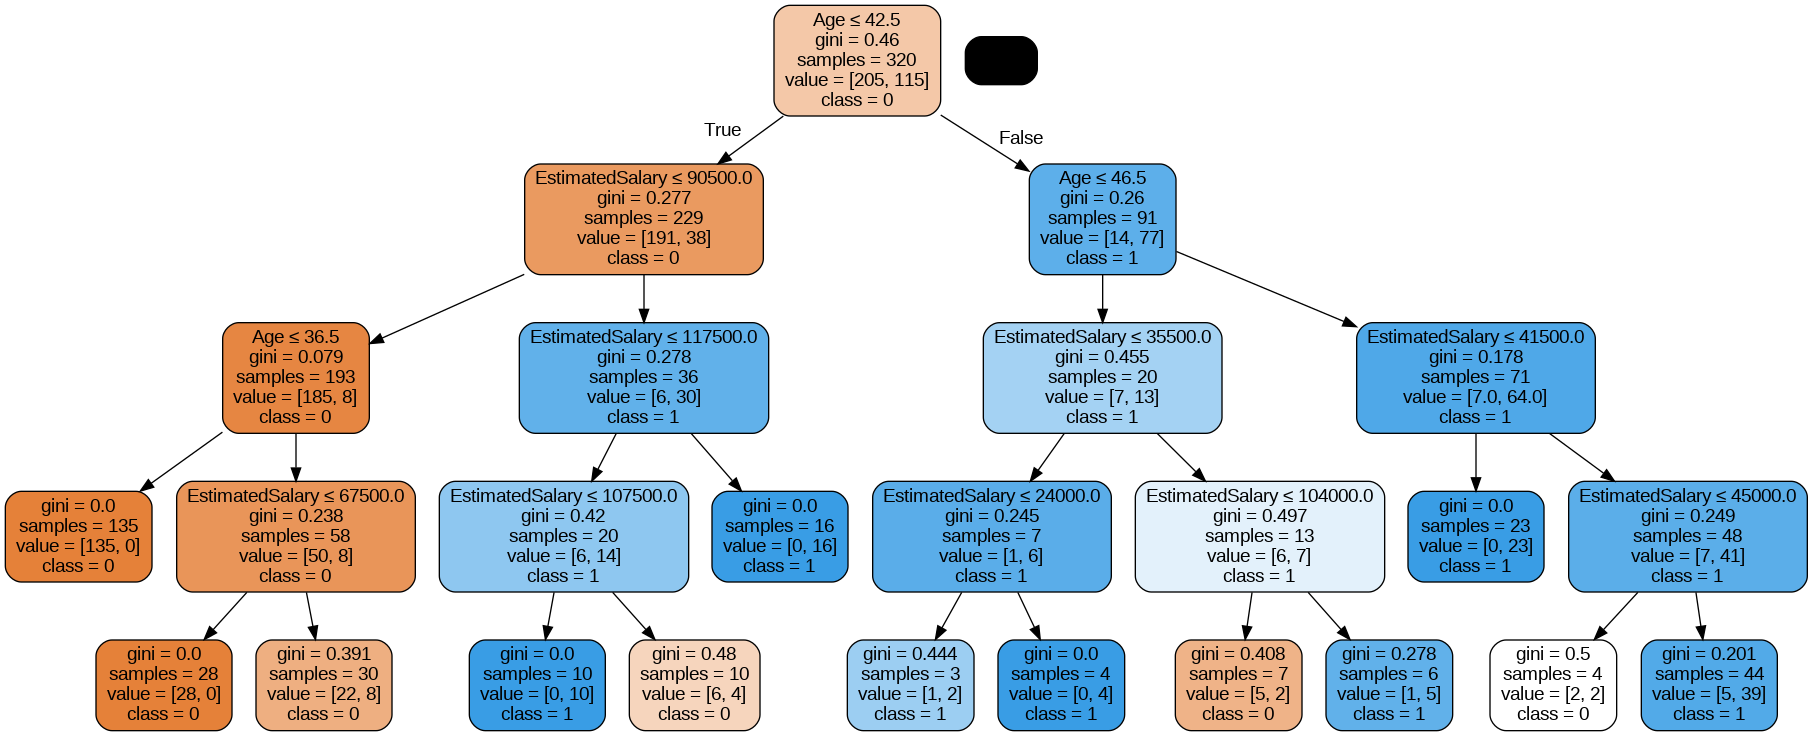

In [212]:
import six
import sys
feature_cols = ['Age','EstimatedSalary']
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(DTC1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('purchase.png')
Image(graph.create_png())

Model 3

In [213]:
DTC2 = DecisionTreeClassifier( criterion='gini')
DTC2.fit(X_train,y_train)

Y_pred = DTC2.predict(X_test)

print(metrics.accuracy_score(y_test,Y_pred) * 100)
print(metrics.confusion_matrix(y_test,Y_pred))
print(metrics.classification_report(y_test,Y_pred))

86.25
[[45  7]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        52
           1       0.77      0.86      0.81        28

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.87      0.86      0.86        80



Model 4

In [214]:
DTC3 = DecisionTreeClassifier(splitter='best')
DTC3.fit(X_train,y_train)

Y_pred = DTC3.predict(X_test)

print(metrics.accuracy_score(y_test,Y_pred) * 100)
print(metrics.confusion_matrix(y_test,Y_pred))
print(metrics.classification_report(y_test,Y_pred))

85.0
[[45  7]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        52
           1       0.77      0.82      0.79        28

    accuracy                           0.85        80
   macro avg       0.83      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80



**Decision Tree Regressor**

In [215]:
data = pd.read_csv('/content/World Happiness Report 2022.csv')

In [216]:
data.head()

,RANK,Country,Happiness_score,Whisker-high,Whisker-low,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,1.945,1.206,0.787,0.651,0.271,0.419


In [217]:
data.isnull().sum()

RANK                            0
Country                         0
Happiness_score                 0
Whisker-high                    0
Whisker-low                     0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

In [218]:
data.columns

Index(['RANK', 'Country', 'Happiness_score', 'Whisker-high', 'Whisker-low',
       'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [219]:
data.drop(['RANK', 'Country','Generosity'],axis = 1, inplace = True)

In [220]:
data.head()

,Happiness_score,Whisker-high,Whisker-low,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption
0,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.534
1,7.636,7.710,7.563,1.953,1.243,0.777,0.719,0.532
2,7.557,7.651,7.464,1.936,1.320,0.803,0.718,0.191
3,7.512,7.586,7.437,2.026,1.226,0.822,0.677,0.461
4,7.415,7.471,7.359,1.945,1.206,0.787,0.651,0.419


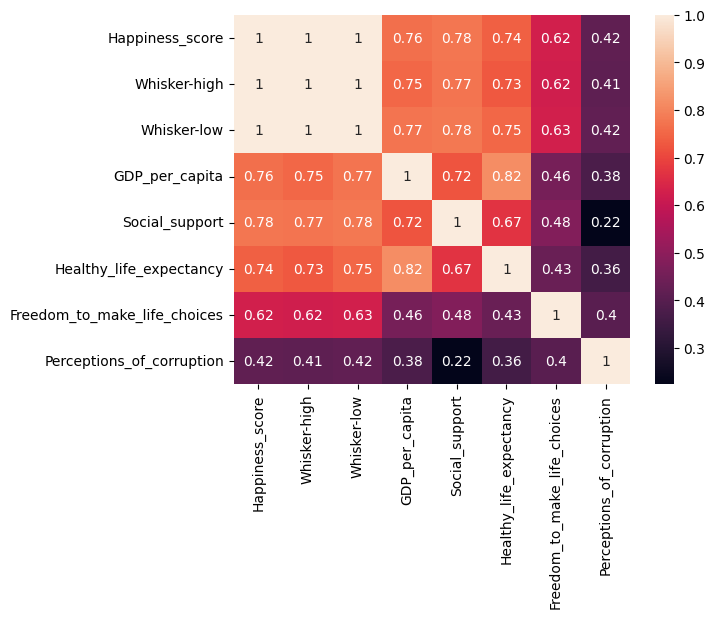

In [221]:
sns.heatmap(data.corr(),annot=True);

In [222]:
x = data[['Whisker-high', 'Whisker-low','GDP_per_capita', 'Social_support', 'Healthy_life_expectancy','Freedom_to_make_life_choices', 'Perceptions_of_corruption']]
y = data['Happiness_score']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

Model 1

In [224]:
tree_classifier = DecisionTreeRegressor(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

In [225]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 0.01457403333333334
Coefficient of Determination (R^2): 0.9880921442488524


Model 2

In [226]:
tree_classifier1 = DecisionTreeRegressor(random_state=42, max_depth = 7)
tree_classifier1.fit(X_train, y_train)
y_pred = tree_classifier1.predict(X_test)

# Calculate the mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 0.012770370370370373
Coefficient of Determination (R^2): 0.9895658446237189


Model 3

In [227]:
tree_classifier2 = DecisionTreeRegressor(random_state=42, min_samples_split = 3)
tree_classifier2.fit(X_train, y_train)
y_pred = tree_classifier2.predict(X_test)

# Calculate the mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 0.007494591666666672
Coefficient of Determination (R^2): 0.9938764709508175


Model 4

In [228]:
tree_classifier3 = DecisionTreeRegressor(random_state=42, min_samples_leaf = 2)
tree_classifier3.fit(X_train, y_train)
y_pred = tree_classifier3.predict(X_test)

# Calculate the mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 0.006304753703703678
Coefficient of Determination (R^2): 0.9948486396364619
